<a href="https://colab.research.google.com/github/kurrnia/Dicoding/blob/main/Membuat%20Model%20NLP%20dengan%20TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Pertama : Membuat Model NLP dengan TensorFlow
## Putri Aulia Savitri

In [4]:
# berfungsi untuk memanggil dataset dari gdrive
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/Dicoding py')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# import pandas
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dicoding py/bbc.csv', sep='\t')
df.head()

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [8]:
new_df = df.drop(columns=['filename'])
new_df.head()

,category,title,content
0,business,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [11]:
kategori = pd.get_dummies(new_df.category)
newest_dataset = pd.concat([new_df, kategori], axis=1)
newest_dataset = newest_dataset.drop(columns='category')
newest_dataset

,title,content,business,entertainment,politics,sport,tech
0,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,1,0,0,0,0
1,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,1,0,0,0,0
2,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,1,0,0,0,0
3,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,1,0,0,0,0
4,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,1,0,0,0,0
...,...,...,...,...,...,...,...
2220,BT program to beat dialler scams,BT is introducing two initiatives to help bea...,0,0,0,0,1
2221,Spam e-mails tempt net shoppers,Computer users across the world continue to i...,0,0,0,0,1
2222,Be careful how you code,A new European directive could put software w...,0,0,0,0,1
2223,US cyber security chief resigns,The man making sure US computer networks are ...,0,0,0,0,1


In [12]:
bbc_news = newest_dataset['title'].values + '' + newest_dataset['content'].values
bbc_berita = newest_dataset[['business', 'entertainment', 'politics', 'sport', 'tech']].values

In [13]:
bbc_news_train, bbc_news_test, bbc_berita_train, bbc_berita_test = train_test_split(bbc_news, bbc_berita, test_size=0.2)

In [14]:
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(bbc_news_train) 
tokenizer.fit_on_texts(bbc_news_test)
 
sekuens_train = tokenizer.texts_to_sequences(bbc_news_train)
sekuens_test = tokenizer.texts_to_sequences(bbc_news_test)
 
padded_train = pad_sequences(sekuens_train) 
padded_test = pad_sequences(sekuens_test)

In [15]:
model = tf.keras.Sequential([
     tf.keras.layers.Embedding(input_dim=5000, output_dim=64),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.LSTM(128),
     tf.keras.layers.Dense(128, activation='relu'),
     tf.keras.layers.Dropout(0.5),
     tf.keras.layers.Dense(5, activation='softmax')
     ])
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          320000    
                                                                 
 batch_normalization (BatchN  (None, None, 64)         256       
 ormalization)                                                   
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                        

In [16]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.75 and logs.get('val_acc')>0.9):
      self.model.stop_training = True
      print("\nAkurasinya > 75%!")

es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1)
callbacks = myCallback()

In [18]:
history = model.fit(padded_train, bbc_berita_train, epochs=50, 
                    validation_data=(padded_test, bbc_berita_test), verbose=2, callbacks=[callbacks], validation_steps=30)

Epoch 1/50
56/56 - 10s - loss: 0.0124 - acc: 0.9966 - val_loss: 1.0414 - val_acc: 0.8157 - 10s/epoch - 176ms/step
Epoch 2/50
56/56 - 12s - loss: 9.4078e-04 - acc: 0.9994 - val_loss: 1.5061 - val_acc: 0.7753 - 12s/epoch - 210ms/step
Epoch 3/50
56/56 - 11s - loss: 0.0151 - acc: 0.9978 - val_loss: 0.9706 - val_acc: 0.8449 - 11s/epoch - 191ms/step
Epoch 4/50
56/56 - 10s - loss: 0.0104 - acc: 0.9983 - val_loss: 1.0159 - val_acc: 0.8449 - 10s/epoch - 173ms/step
Epoch 5/50
56/56 - 10s - loss: 1.2566e-04 - acc: 1.0000 - val_loss: 0.9719 - val_acc: 0.8517 - 10s/epoch - 174ms/step
Epoch 6/50
56/56 - 11s - loss: 0.0054 - acc: 0.9978 - val_loss: 1.0446 - val_acc: 0.8180 - 11s/epoch - 188ms/step
Epoch 7/50
56/56 - 11s - loss: 2.5787e-04 - acc: 1.0000 - val_loss: 1.0006 - val_acc: 0.8292 - 11s/epoch - 198ms/step
Epoch 8/50
56/56 - 10s - loss: 6.5658e-05 - acc: 1.0000 - val_loss: 0.9768 - val_acc: 0.8517 - 10s/epoch - 185ms/step
Epoch 9/50
56/56 - 9s - loss: 0.0011 - acc: 0.9994 - val_loss: 1.0380 - 

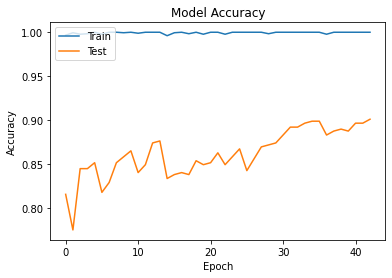

In [19]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

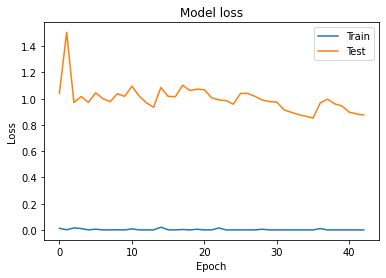

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()